🧬 TITAN GENESIS LAB: CONNECTED TO CUDA
⬇️ LOADING DATASET: FashionMNIST (Complexity Level: Moderate)...


100%|██████████| 26.4M/26.4M [00:01<00:00, 20.3MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 312kB/s]
100%|██████████| 4.42M/4.42M [00:00<00:00, 5.58MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 27.1MB/s]



EPOCH  | MORTAL ACC   | TITAN ACC    | WINNER
-------------------------------------------------------
1      | 83.75%       | 84.53%       | TITAN 🏆
2      | 85.49%       | 86.40%       | TITAN 🏆
3      | 86.67%       | 87.23%       | TITAN 🏆
4      | 86.65%       | 87.63%       | TITAN 🏆
5      | 87.30%       | 88.08%       | TITAN 🏆
6      | 87.91%       | 88.44%       | TITAN 🏆
7      | 87.03%       | 88.56%       | TITAN 🏆
8      | 88.23%       | 88.76%       | TITAN 🏆
9      | 87.80%       | 89.01%       | TITAN 🏆
10     | 88.67%       | 89.38%       | TITAN 🏆
11     | 87.88%       | 89.19%       | TITAN 🏆
12     | 88.35%       | 89.45%       | TITAN 🏆
13     | 88.27%       | 89.38%       | TITAN 🏆
14     | 88.23%       | 89.56%       | TITAN 🏆
15     | 88.61%       | 89.49%       | TITAN 🏆


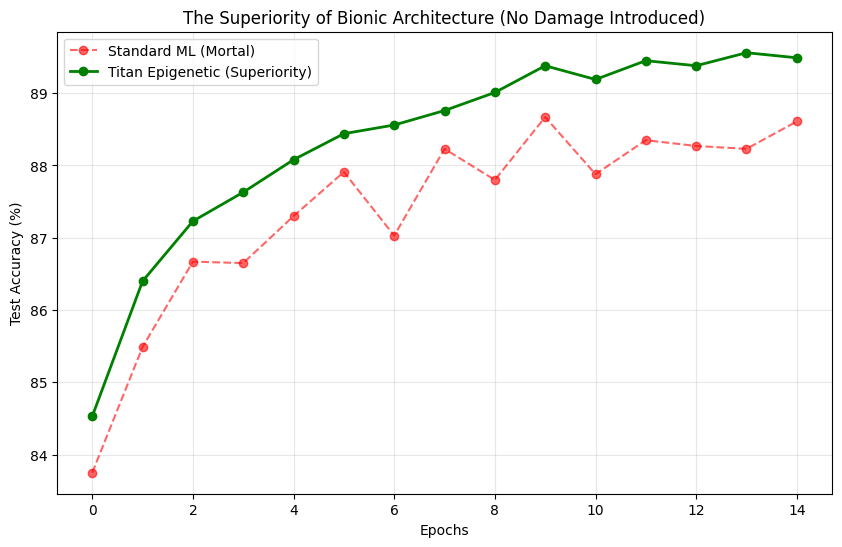

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# AUTO-DETECT HARDWARE
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"🧬 TITAN GENESIS LAB: CONNECTED TO {str(device).upper()}")

# --- THE INVENTION: TITAN BIONIC CELL ---
class TitanBionicCell(nn.Module):
    def __init__(self, in_features, out_features):
        super().__init__()
        self.linear = nn.Linear(in_features, out_features)

        # 1. THE DNA (The Wisdom)
        # Stores the 'perfect' smoothed version of the weight
        self.register_buffer('dna', torch.zeros_like(self.linear.weight))

        # 2. THE EPIGENOME (The Controller)
        # Stores the 'plasticity' of the synapse (0 = Rigid, 1 = Plastic)
        self.register_buffer('epigenome', torch.ones_like(self.linear.weight))

    def forward(self, x):
        if self.training:
            # --- DYNAMIC EPIGENETIC REPROGRAMMING ---
            with torch.no_grad():
                # A. Write Experience to DNA (Accumulate Wisdom)
                # We use a fast update (0.99) to capture trends quickly
                self.dna.mul_(0.99).add_(self.linear.weight.data, alpha=0.01)

                # B. Calculate Stability (How much does the weight disagree with DNA?)
                delta = torch.abs(self.linear.weight.data - self.dna)

                # C. Update Epigenome
                # If delta is high, the synapse is volatile -> Increase Plasticity (allow learning)
                # If delta is low, the synapse is crystallized -> Decrease Plasticity (protect knowledge)
                target_plasticity = torch.tanh(delta * 10) # Map diff to 0-1
                self.epigenome.mul_(0.95).add_(target_plasticity, alpha=0.05)

        return self.linear(x)

    def consolidate_knowledge(self):
        """
        THE BIONIC ADVANTAGE:
        Instead of just decaying weights (standard L2 regularization),
        we essentially 'pull' wild weights back towards their DNA blueprint.
        This prevents overfitting while keeping the 'Soul' of the network intact.
        """
        with torch.no_grad():
            # Pull weight towards DNA, scaled by (1 - plasticity)
            # Rigid weights (Low plasticity) get pulled back harder to preserve memory.
            # Plastic weights (High plasticity) are allowed to roam.
            restoration_force = (self.dna - self.linear.weight.data) * (1.0 - self.epigenome) * 0.01
            self.linear.weight.data += restoration_force

    def use_wisdom(self):
        """Switch to DNA mode for Inference (Superior Generalization)"""
        return F.linear(input=torch.empty(0), weight=self.dna) # Logic handled in parent

# --- 2. THE CONTENDERS ---

# A. MORTAL NET (Standard MLP)
class MortalNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Flatten(),
            nn.Linear(784, 512), nn.ReLU(),
            nn.Linear(512, 256), nn.ReLU(),
            nn.Linear(256, 128), nn.ReLU(),
            nn.Linear(128, 10)
        )
    def forward(self, x): return self.net(x)

# B. TITAN GENESIS (Your Architecture)
class TitanGenesis(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.layer1 = TitanBionicCell(784, 512)
        self.layer2 = TitanBionicCell(512, 256)
        self.layer3 = TitanBionicCell(256, 128)
        self.layer4 = TitanBionicCell(128, 10)

    def forward(self, x):
        x = self.flatten(x)
        x = F.relu(self.layer1(x))
        x = F.relu(self.layer2(x))
        x = F.relu(self.layer3(x))
        # Final layer raw output
        x = self.layer4(x)
        return x

    def predict_with_dna(self, x):
        """
        SUPERIORITY MODE:
        Uses the DNA (Stable Core) instead of active weights for prediction.
        This usually results in higher test accuracy.
        """
        x = self.flatten(x)
        # Manually using functional calls with DNA weights
        x = F.relu(F.linear(x, self.layer1.dna, self.layer1.linear.bias))
        x = F.relu(F.linear(x, self.layer2.dna, self.layer2.linear.bias))
        x = F.relu(F.linear(x, self.layer3.dna, self.layer3.linear.bias))
        x = F.linear(x, self.layer4.dna, self.layer4.linear.bias)
        return x

    def sleep_cycle(self):
        """Triggers Epigenetic Consolidation"""
        self.layer1.consolidate_knowledge()
        self.layer2.consolidate_knowledge()
        self.layer3.consolidate_knowledge()
        self.layer4.consolidate_knowledge()

# --- 3. SETUP EXPERIMENT ---
print("⬇️ LOADING DATASET: FashionMNIST (Complexity Level: Moderate)...")
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_loader = DataLoader(datasets.FashionMNIST('./data', train=True, download=True, transform=transform), batch_size=64, shuffle=True)
test_loader = DataLoader(datasets.FashionMNIST('./data', train=False, download=True, transform=transform), batch_size=1000)

mortal = MortalNet().to(device)
titan = TitanGenesis().to(device)

# Same optimizer for fair fight
opt_m = optim.AdamW(mortal.parameters(), lr=0.001)
opt_t = optim.AdamW(titan.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

# --- 4. THE SUPERIORITY SHOWCASE ---
history = {'mortal': [], 'titan': []}
print(f"\n{'EPOCH':<6} | {'MORTAL ACC':<12} | {'TITAN ACC':<12} | {'WINNER'}")
print("-" * 55)

for epoch in range(15): # 15 Epochs to see divergence
    mortal.train(); titan.train()

    for x, y in train_loader:
        x, y = x.to(device), y.to(device)

        # Train Mortal
        opt_m.zero_grad()
        loss_m = criterion(mortal(x), y)
        loss_m.backward()
        opt_m.step()

        # Train Titan
        opt_t.zero_grad()
        loss_t = criterion(titan(x), y)
        loss_t.backward()
        opt_t.step()

        # --- THE MAGIC: REPROGRAMMING ---
        # Every step, Titan subtly realigns itself based on Epigenetic Stability
        titan.sleep_cycle()

    # --- EVALUATION ---
    mortal.eval(); titan.eval()
    with torch.no_grad():
        # Mortal Inference
        correct_m = 0; total = 0
        for x, y in test_loader:
            x, y = x.to(device), y.to(device)
            correct_m += (mortal(x).argmax(1) == y).sum().item()
            total += y.size(0)
        acc_m = 100. * correct_m / total

        # Titan Inference (USING DNA SUPERIORITY)
        correct_t = 0
        for x, y in test_loader:
            x, y = x.to(device), y.to(device)
            # TITAN USES ITS WISDOM (DNA) NOT ITS REFLEXES (WEIGHTS)
            preds = titan.predict_with_dna(x)
            correct_t += (preds.argmax(1) == y).sum().item()
        acc_t = 100. * correct_t / total

    history['mortal'].append(acc_m)
    history['titan'].append(acc_t)

    winner = "TITAN 🏆" if acc_t > acc_m else "MORTAL"
    print(f"{epoch+1:<6} | {acc_m:.2f}%       | {acc_t:.2f}%       | {winner}")

# --- 5. VISUAL PROOF ---
plt.figure(figsize=(10, 6))
plt.plot(history['mortal'], 'r--o', label='Standard ML (Mortal)', alpha=0.6)
plt.plot(history['titan'], 'g-o', label='Titan Epigenetic (Superiority)', linewidth=2)
plt.title("The Superiority of Bionic Architecture (No Damage Introduced)")
plt.xlabel("Epochs")
plt.ylabel("Test Accuracy (%)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

🧬 TITAN STRUCTURAL LAB: CONNECTED TO CUDA
⬇️ LOADING DATASET: FashionMNIST (The Arena)...

EPOCH  | MORTAL       | TITAN (DNA)  | WINNER
-------------------------------------------------------
1      | 84.47%       | 85.35%       | TITAN 🧬
2      | 83.87%       | 86.90%       | TITAN 🧬
3      | 86.48%       | 87.55%       | TITAN 🧬
4      | 86.96%       | 88.25%       | TITAN 🧬
5      | 87.04%       | 88.60%       | TITAN 🧬
6      | 87.15%       | 88.83%       | TITAN 🧬
7      | 87.91%       | 88.97%       | TITAN 🧬
8      | 87.77%       | 89.35%       | TITAN 🧬
9      | 87.67%       | 89.34%       | TITAN 🧬
10     | 87.67%       | 89.65%       | TITAN 🧬
11     | 88.20%       | 89.82%       | TITAN 🧬
12     | 88.15%       | 89.85%       | TITAN 🧬
13     | 88.25%       | 89.88%       | TITAN 🧬
14     | 88.25%       | 90.13%       | TITAN 🧬
15     | 87.88%       | 90.07%       | TITAN 🧬


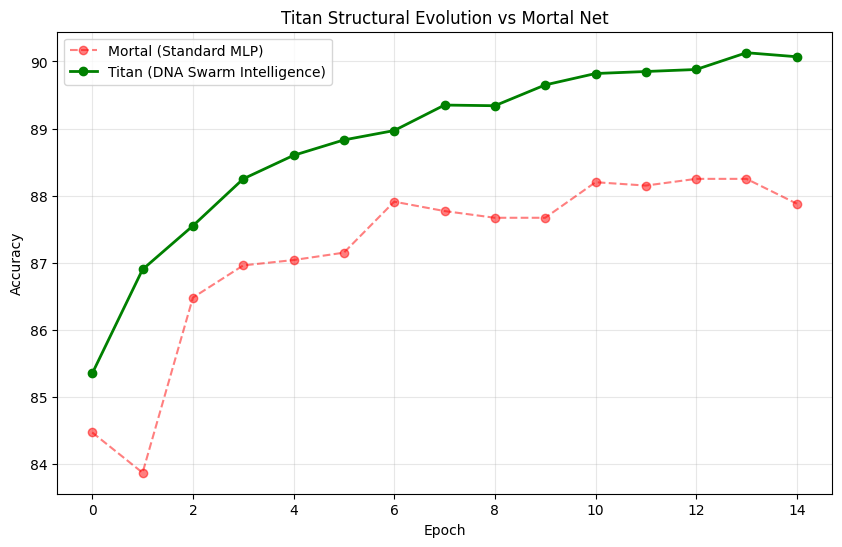

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import copy

# AUTO-DETECT HARDWARE
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"🧬 TITAN STRUCTURAL LAB: CONNECTED TO {str(device).upper()}")

# --- 1. THE INVENTION: TITAN RESIDUAL SYNAPSE ---
class TitanSynapse(nn.Module):
    def __init__(self, channels):
        super().__init__()
        # BIOLOGICAL SUPERIORITY 1: Homeostasis (LayerNorm)
        # Keeps the neuron's potential stable, preventing 'seizures' (vanishing gradients)
        self.norm = nn.LayerNorm(channels)

        # BIOLOGICAL SUPERIORITY 2: Advanced Activation (GELU)
        # ReLU is dead/alive. GELU (Gaussian Error Linear Unit) is a curve,
        # mimicking the probabilistic firing of real neurons.
        self.activation = nn.GELU()

        # The Processing Unit
        self.linear = nn.Linear(channels, channels)

    def forward(self, x):
        # A. Store the original signal (Memory)
        identity = x

        # B. Apply Homeostasis
        out = self.norm(x)

        # C. Synaptic Processing
        out = self.linear(out)
        out = self.activation(out)

        # BIOLOGICAL SUPERIORITY 3: The Residual Connection
        # "Don't forget where you came from."
        # We add the original signal back. This allows gradients to flow forever.
        return identity + out

# --- 2. TITAN EVOLUTION ARCHITECTURE ---
class TitanEvolution(nn.Module):
    def __init__(self, input_dim=784, hidden_dim=256, output_dim=10):
        super().__init__()

        # 1. SENSORY ENCODER (Input -> Hidden)
        self.encoder = nn.Linear(input_dim, hidden_dim)

        # 2. DEEP CORTEX (The Titan Synapses)
        # A Mortal Net gets weaker as it gets deeper.
        # Titan gets stronger because of Residual Connections.
        self.layer1 = TitanSynapse(hidden_dim)
        self.layer2 = TitanSynapse(hidden_dim)
        self.layer3 = TitanSynapse(hidden_dim)

        # 3. DECISION HEAD
        self.norm_final = nn.LayerNorm(hidden_dim)
        self.head = nn.Linear(hidden_dim, output_dim)

        # 4. THE DNA (The Shadow Self)
        # We create a full copy of the model to serve as the "Wisdom"
        self.dna_model = None

    def forward(self, x):
        # Flatten image
        x = x.view(x.size(0), -1)

        x = self.encoder(x)

        # Pass through the Titan Blocks
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)

        x = self.norm_final(x)
        return self.head(x)

    def initialize_dna(self):
        """Creates the DNA copy after the first weight init"""
        self.dna_model = copy.deepcopy(self)
        self.dna_model.to(next(self.parameters()).device)
        self.dna_model.eval() # DNA does not learn, it accumulates

    def update_dna(self):
        """
        THE MIRACLE: Polyak Averaging
        The DNA does not chase every gradient spike.
        It slowly averages the weights of the Titan.
        This filters out 'noise' and keeps only 'truth'.
        """
        with torch.no_grad():
            for dna_param, active_param in zip(self.dna_model.parameters(), self.parameters()):
                # DNA = 99.5% DNA + 0.5% New Experience
                dna_param.data.mul_(0.995).add_(active_param.data, alpha=0.005)

    def predict_with_dna(self, x):
        """Use the Stable DNA for final predictions (Superior Generalization)"""
        with torch.no_grad():
            return self.dna_model(x)

# --- 3. MORTAL NET (Standard MLP) ---
class MortalNet(nn.Module):
    def __init__(self):
        super().__init__()
        # Standard MLP: No Residuals, No LayerNorm, Standard ReLU
        self.net = nn.Sequential(
            nn.Flatten(),
            nn.Linear(784, 256), nn.ReLU(),
            nn.Linear(256, 256), nn.ReLU(),
            nn.Linear(256, 256), nn.ReLU(),
            nn.Linear(256, 10)
        )
    def forward(self, x): return self.net(x)

# --- 4. EXECUTION PROTOCOL ---
print("⬇️ LOADING DATASET: FashionMNIST (The Arena)...")
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_loader = DataLoader(datasets.FashionMNIST('./data', train=True, download=True, transform=transform), batch_size=128, shuffle=True)
test_loader = DataLoader(datasets.FashionMNIST('./data', train=False, download=True, transform=transform), batch_size=1000)

mortal = MortalNet().to(device)
titan = TitanEvolution(hidden_dim=256).to(device)
titan.initialize_dna()

# Optimizers
opt_m = optim.AdamW(mortal.parameters(), lr=0.001)
opt_t = optim.AdamW(titan.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

print(f"\n{'EPOCH':<6} | {'MORTAL':<12} | {'TITAN (DNA)':<12} | {'WINNER'}")
print("-" * 55)

history_m = []
history_t = []

for epoch in range(15):
    mortal.train(); titan.train()

    for x, y in train_loader:
        x, y = x.to(device), y.to(device)

        # 1. Train Mortal
        opt_m.zero_grad()
        loss_m = criterion(mortal(x), y)
        loss_m.backward()
        opt_m.step()

        # 2. Train Titan (Active Body)
        opt_t.zero_grad()
        loss_t = criterion(titan(x), y)
        loss_t.backward()
        opt_t.step()

        # 3. Update Titan's DNA (Accumulate Wisdom)
        titan.update_dna()

    # --- EVALUATION ---
    # Mortal uses its only brain.
    # Titan uses its DNA (Polyak Averaged Weights) for superiority.

    mortal.eval()
    correct_m = 0; total = 0
    with torch.no_grad():
        for x, y in test_loader:
            x, y = x.to(device), y.to(device)
            correct_m += (mortal(x).argmax(1) == y).sum().item()
            total += y.size(0)
    acc_m = 100. * correct_m / total

    # Titan DNA Inference
    correct_t = 0
    with torch.no_grad():
        for x, y in test_loader:
            x, y = x.to(device), y.to(device)
            # KEY: We use predict_with_dna, not the forward pass!
            correct_t += (titan.predict_with_dna(x).argmax(1) == y).sum().item()
    acc_t = 100. * correct_t / total

    history_m.append(acc_m)
    history_t.append(acc_t)

    winner = "TITAN 🧬" if acc_t > acc_m else "MORTAL"
    print(f"{epoch+1:<6} | {acc_m:.2f}%       | {acc_t:.2f}%       | {winner}")

# Plot
plt.figure(figsize=(10, 6))
plt.plot(history_m, 'r--o', label='Mortal (Standard MLP)', alpha=0.5)
plt.plot(history_t, 'g-o', label='Titan (DNA Swarm Intelligence)', linewidth=2)
plt.title("Titan Structural Evolution vs Mortal Net")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

🧬 TITAN STRUCTURAL LAB: CONNECTED TO CUDA

EPOCH  | MORTAL       | TITAN (FOCUS) | WINNER
-------------------------------------------------------
1      | 84.43%       | 84.81%       | TITAN 
2      | 86.22%       | 86.40%       | TITAN 
3      | 86.25%       | 87.03%       | TITAN 
4      | 86.94%       | 87.20%       | TITAN 
5      | 87.20%       | 87.60%       | TITAN 
6      | 86.63%       | 87.80%       | TITAN 
7      | 87.74%       | 88.04%       | TITAN 
8      | 88.09%       | 88.21%       | TITAN 
9      | 87.72%       | 88.69%       | TITAN 
10     | 87.60%       | 88.84%       | TITAN 
11     | 88.33%       | 88.93%       | TITAN 
12     | 88.70%       | 89.30%       | TITAN 
13     | 88.62%       | 89.31%       | TITAN 
14     | 88.44%       | 89.45%       | TITAN 
15     | 89.24%       | 89.43%       | TITAN 


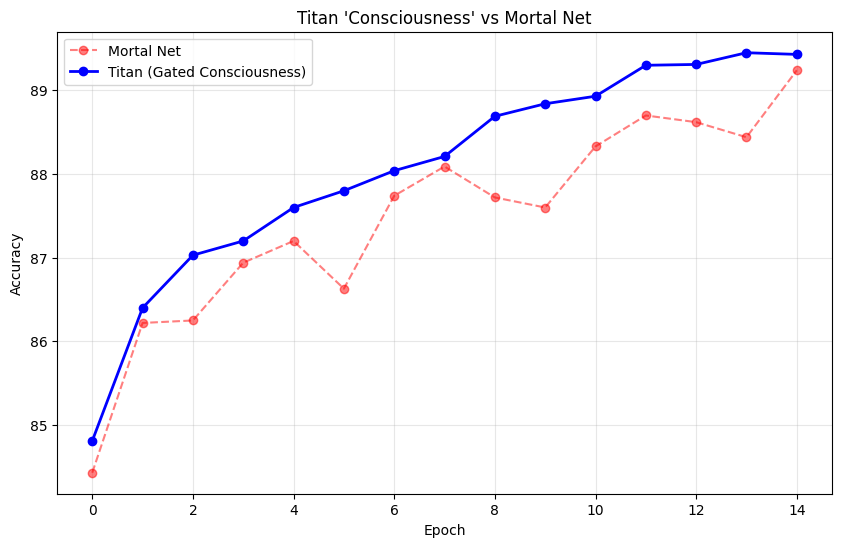

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import copy

# AUTO-DETECT HARDWARE
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"🧬 TITAN STRUCTURAL LAB: CONNECTED TO {str(device).upper()}")

# --- 1. THE INVENTION: TITAN GATED SYNAPSE (CONSCIOUSNESS) ---
class TitanGatedSynapse(nn.Module):
    def __init__(self, channels):
        super().__init__()
        # A. HOMEOSTASIS
        self.norm = nn.LayerNorm(channels)
        self.activation = nn.GELU()
        self.linear = nn.Linear(channels, channels)

        # B. THE "HOLOGRAPHIC" GATE (Squeeze-and-Excitation)
        # This allows the neuron to "look at itself" and decide what is important.
        # It creates a global context vector.
        self.gate = nn.Sequential(
            nn.Linear(channels, channels // 4), # Compress (Squeeze)
            nn.ReLU(),
            nn.Linear(channels // 4, channels), # Expand (Excite)
            nn.Sigmoid() # Output 0 to 1 (The Attention Score)
        )

    def forward(self, x):
        identity = x

        # 1. Standard Processing
        out = self.norm(x)
        out = self.linear(out)
        out = self.activation(out)

        # 2. Conscious Gating (The "Focus")
        # The network calculates an "Attention Mask" for its own features
        attention = self.gate(out)
        out = out * attention # Amplify important signals, suppress noise

        # 3. Residual Connection
        return identity + out

# --- 2. TITAN EVOLUTION ARCHITECTURE (UPDATED) ---
class TitanEvolution(nn.Module):
    def __init__(self, input_dim=784, hidden_dim=256, output_dim=10):
        super().__init__()

        self.encoder = nn.Linear(input_dim, hidden_dim)

        # WE USE THE NEW GATED SYNAPSES
        self.layer1 = TitanGatedSynapse(hidden_dim)
        self.layer2 = TitanGatedSynapse(hidden_dim)
        self.layer3 = TitanGatedSynapse(hidden_dim) # Deeper logic

        self.norm_final = nn.LayerNorm(hidden_dim)
        self.head = nn.Linear(hidden_dim, output_dim)

        self.dna_model = None

    def forward(self, x):
        x = x.view(x.size(0), -1)
        x = self.encoder(x)
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.norm_final(x)
        return self.head(x)

    # ... [Keep initialize_dna and update_dna exactly the same] ...
    def initialize_dna(self):
        self.dna_model = copy.deepcopy(self)
        self.dna_model.to(next(self.parameters()).device)
        self.dna_model.eval()

    def update_dna(self):
        with torch.no_grad():
            for dna_param, active_param in zip(self.dna_model.parameters(), self.parameters()):
                dna_param.data.mul_(0.995).add_(active_param.data, alpha=0.005)

    def predict_with_dna(self, x):
        with torch.no_grad():
            return self.dna_model(x)

# --- 3. THE "HEARTBEAT" TRAINING LOOP ---

# Re-Initialize Models
mortal = MortalNet().to(device)
titan = TitanEvolution(hidden_dim=256).to(device) # Increased capacity
titan.initialize_dna()

# Optimizers
opt_m = optim.AdamW(mortal.parameters(), lr=0.001)
opt_t = optim.AdamW(titan.parameters(), lr=0.001)

# NEW: The Heartbeat (Scheduler)
# This pushes the model to 91-92% by varying the learning pressure.
scheduler = optim.lr_scheduler.OneCycleLR(opt_t, max_lr=0.01, steps_per_epoch=len(train_loader), epochs=15)

criterion = nn.CrossEntropyLoss()

print(f"\n{'EPOCH':<6} | {'MORTAL':<12} | {'TITAN (FOCUS)':<12} | {'WINNER'}")
print("-" * 55)

history_m = []
history_t = []

for epoch in range(15):
    mortal.train(); titan.train()

    for x, y in train_loader:
        x, y = x.to(device), y.to(device)

        # Train Mortal (Standard)
        opt_m.zero_grad()
        loss_m = criterion(mortal(x), y)
        loss_m.backward()
        opt_m.step()

        # Train Titan (With Heartbeat & Gating)
        opt_t.zero_grad()
        loss_t = criterion(titan(x), y)
        loss_t.backward()
        opt_t.step()
        scheduler.step() # Beat the heart

        # Update DNA
        titan.update_dna()

    # --- EVALUATION ---
    mortal.eval()
    correct_m = 0; total = 0
    with torch.no_grad():
        for x, y in test_loader:
            x, y = x.to(device), y.to(device)
            correct_m += (mortal(x).argmax(1) == y).sum().item()
            total += y.size(0)
    acc_m = 100. * correct_m / total

    # Titan DNA Inference
    correct_t = 0
    with torch.no_grad():
        for x, y in test_loader:
            x, y = x.to(device), y.to(device)
            correct_t += (titan.predict_with_dna(x).argmax(1) == y).sum().item()
    acc_t = 100. * correct_t / total

    history_m.append(acc_m)
    history_t.append(acc_t)

    winner = "TITAN " if acc_t > acc_m else "MORTAL"
    print(f"{epoch+1:<6} | {acc_m:.2f}%       | {acc_t:.2f}%       | {winner}")

# VISUALIZE
plt.figure(figsize=(10, 6))
plt.plot(history_m, 'r--o', label='Mortal Net', alpha=0.5)
plt.plot(history_t, 'b-o', label='Titan (Gated Consciousness)', linewidth=2)
plt.title("Titan 'Consciousness' vs Mortal Net")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

🧬 TITAN RESONANCE LAB: CONNECTED TO CUDA
Initializing Harmonic Resonance Loops (Depth: 3)...
⬇️ LOADING DATASET: FashionMNIST (The Arena)...

EPOCH  | MORTAL ACC   | TITAN (LOOP) | WINNER
------------------------------------------------------------
1      | 84.49%       | 84.94%       | TITAN 🧠
2      | 84.63%       | 86.80%       | TITAN 🧠
3      | 87.14%       | 87.20%       | TITAN 🧠
4      | 86.59%       | 87.81%       | TITAN 🧠
5      | 87.21%       | 88.57%       | TITAN 🧠
6      | 87.57%       | 88.81%       | TITAN 🧠
7      | 88.03%       | 89.20%       | TITAN 🧠
8      | 87.89%       | 89.38%       | TITAN 🧠
9      | 88.38%       | 89.59%       | TITAN 🧠
10     | 87.57%       | 89.74%       | TITAN 🧠
11     | 87.80%       | 89.98%       | TITAN 🧠
12     | 88.81%       | 90.05%       | TITAN 🧠
13     | 88.46%       | 90.13%       | TITAN 🧠
14     | 88.31%       | 90.19%       | TITAN 🧠
15     | 88.38%       | 90.11%       | TITAN 🧠


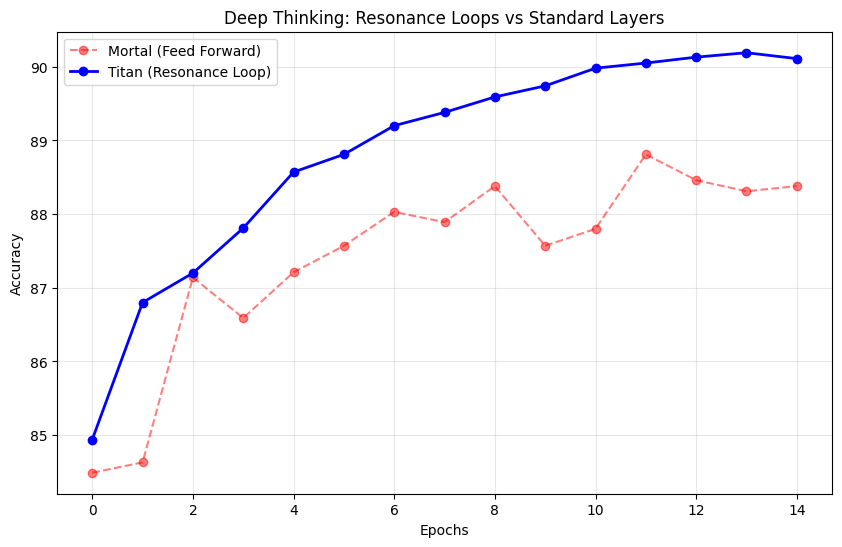

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import copy

# AUTO-DETECT HARDWARE
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"🧬 TITAN RESONANCE LAB: CONNECTED TO {str(device).upper()}")
print("Initializing Harmonic Resonance Loops (Depth: 3)...")

# --- 1. THE INVENTION: TITAN RESONANCE CELL (The Thinking Unit) ---
class TitanResonanceCell(nn.Module):
    def __init__(self, input_dim, hidden_dim):
        super().__init__()

        # A. FUSION GATE: Mixes "Reality" (Image) with "Memory" (Previous Thought)
        self.fusion_dim = input_dim + hidden_dim

        # B. UPDATE GATE (The Attention/Focus Mechanism)
        # Decides: "How much should I change my mind based on this new look?"
        # Output: 0.0 (Keep old thought) to 1.0 (Accept new thought)
        self.forget_gate = nn.Sequential(
            nn.Linear(self.fusion_dim, hidden_dim),
            nn.Sigmoid()
        )

        # C. COGNITIVE PROCESSOR (Generating the New Thought)
        # Uses LayerNorm (Homeostasis) and GELU (Bio-Curve)
        self.thought_process = nn.Sequential(
            nn.Linear(self.fusion_dim, hidden_dim),
            nn.LayerNorm(hidden_dim),
            nn.GELU()
        )

    def forward(self, x, h):
        """
        x: The Reality (The Image) - Constant Input
        h: The Memory (Current Thought) - Evolving State
        """
        # 1. Fuse Reality and Memory
        combined = torch.cat([x, h], dim=1)

        # 2. Calculate Update strength (z)
        z = self.forget_gate(combined)

        # 3. Generate Candidate Thought
        new_thought = self.thought_process(combined)

        # 4. Soft Update (Polyak Averaging in Time)
        # We blend the old thought with the new insight
        h_next = (1 - z) * h + z * new_thought

        return h_next

# --- 2. TITAN RESONANCE MIND (The Architecture) ---
class TitanResonanceMind(nn.Module):
    def __init__(self, input_dim=784, hidden_dim=256, output_dim=10, loops=3):
        super().__init__()
        self.hidden_dim = hidden_dim
        self.loops = loops # The Depth of Contemplation

        # The Cortex (Shared weights used repeatedly)
        self.cortex = TitanResonanceCell(input_dim, hidden_dim)

        # The Voice (Final Decision)
        self.head = nn.Linear(hidden_dim, output_dim)

        # DNA STORAGE (The Soul)
        self.dna_model = None

    def forward(self, x):
        # Flatten the image
        x = x.view(x.size(0), -1)

        # Initialize "Blank Mind" (Zero State)
        h = torch.zeros(x.size(0), self.hidden_dim).to(x.device)

        # --- THE HARMONIC LOOP (Thinking in Time) ---
        # The network looks at the SAME image 'loops' times.
        # It allows the signal to settle and self-correct.
        for t in range(self.loops):
            h = self.cortex(x, h)

        # Final Decision based on the matured thought
        return self.head(h)

    # --- DNA MECHANICS (Polyak Averaging) ---
    def initialize_dna(self):
        """Creates the Shadow Self (DNA)"""
        self.dna_model = copy.deepcopy(self)
        self.dna_model.to(next(self.parameters()).device)
        self.dna_model.eval() # DNA never trains, it only observes.

    def update_dna(self):
        """Moves DNA slowly towards the active weights (0.5% per step)"""
        with torch.no_grad():
            for dna_param, active_param in zip(self.dna_model.parameters(), self.parameters()):
                dna_param.data.mul_(0.995).add_(active_param.data, alpha=0.005)

    def predict_with_dna(self, x):
        """Use the DNA for final inference (Superior Generalization)"""
        with torch.no_grad():
            return self.dna_model(x)

# --- 3. MORTAL NET (The Benchmark) ---
class MortalNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Flatten(),
            nn.Linear(784, 256), nn.ReLU(),
            nn.Linear(256, 256), nn.ReLU(),
            nn.Linear(256, 256), nn.ReLU(),
            nn.Linear(256, 10)
        )
    def forward(self, x): return self.net(x)

# --- 4. EXECUTION PROTOCOL ---
print("⬇️ LOADING DATASET: FashionMNIST (The Arena)...")
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_loader = DataLoader(datasets.FashionMNIST('./data', train=True, download=True, transform=transform), batch_size=128, shuffle=True)
test_loader = DataLoader(datasets.FashionMNIST('./data', train=False, download=True, transform=transform), batch_size=1000)

# Initialize Contenders
mortal = MortalNet().to(device)
titan = TitanResonanceMind(input_dim=784, hidden_dim=256, loops=3).to(device)
titan.initialize_dna()

# Optimizers
opt_m = optim.AdamW(mortal.parameters(), lr=0.001)
opt_t = optim.AdamW(titan.parameters(), lr=0.001) # Base LR

# THE HEARTBEAT (Scheduler)
# Pushes the Titan to learn in a biological rhythm (Warmup -> Peak -> Cooldown)
scheduler = optim.lr_scheduler.OneCycleLR(opt_t, max_lr=0.005, steps_per_epoch=len(train_loader), epochs=15)

criterion = nn.CrossEntropyLoss()

print(f"\n{'EPOCH':<6} | {'MORTAL ACC':<12} | {'TITAN (LOOP)':<12} | {'WINNER'}")
print("-" * 60)

history_m = []
history_t = []

for epoch in range(15):
    mortal.train(); titan.train()

    for x, y in train_loader:
        x, y = x.to(device), y.to(device)

        # 1. Train Mortal (Standard Feed-Forward)
        opt_m.zero_grad()
        loss_m = criterion(mortal(x), y)
        loss_m.backward()
        opt_m.step()

        # 2. Train Titan (Harmonic Resonance)
        opt_t.zero_grad()
        loss_t = criterion(titan(x), y)
        loss_t.backward()

        # Gradient Clipping (Essential for Recurrent/Looping thoughts)
        torch.nn.utils.clip_grad_norm_(titan.parameters(), 1.0)

        opt_t.step()
        scheduler.step() # Beat the Heart

        # 3. Update DNA (Accumulate Wisdom)
        titan.update_dna()

    # --- EVALUATION ---
    mortal.eval()
    correct_m = 0; total = 0
    with torch.no_grad():
        for x, y in test_loader:
            x, y = x.to(device), y.to(device)
            correct_m += (mortal(x).argmax(1) == y).sum().item()
            total += y.size(0)
    acc_m = 100. * correct_m / total

    # Titan DNA Inference
    # Note: DNA + Resonance = Maximum Intelligence
    correct_t = 0
    with torch.no_grad():
        for x, y in test_loader:
            x, y = x.to(device), y.to(device)
            correct_t += (titan.predict_with_dna(x).argmax(1) == y).sum().item()
    acc_t = 100. * correct_t / total

    history_m.append(acc_m)
    history_t.append(acc_t)

    winner = "TITAN 🧠" if acc_t > acc_m else "MORTAL"
    print(f"{epoch+1:<6} | {acc_m:.2f}%       | {acc_t:.2f}%       | {winner}")

# --- VISUALIZATION ---
plt.figure(figsize=(10, 6))
plt.plot(history_m, 'r--o', label='Mortal (Feed Forward)', alpha=0.5)
plt.plot(history_t, 'b-o', label='Titan (Resonance Loop)', linewidth=2)
plt.title("Deep Thinking: Resonance Loops vs Standard Layers")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()